In [1]:
#https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3
#Performing Time Series analysis based on the steps given above.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dateutil.relativedelta import relativedelta
from scipy.optimize import minimize

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# Reading the data

data = pd.read_csv(r'C:\Users\kmoudgalya\Desktop\Pork Price Prediction Challenge\FoodPriceIndexData_Updated\MRDS_Index_Data_D_Labs_Training_Updated.csv', index_col = ['Date'], parse_dates = ['Date'])
print(data)

            Beef_CS_LiveWgt_PerHd  Beef_CS_Slaughter_Cnt  Beef_ME_Exp_cwt  \
Date                                                                        
2000-01-01                   1229                 2935.8        206469.85   
2000-02-01                   1225                 2936.9        208032.37   
2000-03-01                   1215                 3131.6        216889.30   
2000-04-01                   1202                 2783.4        191278.72   
2000-05-01                   1196                 3177.9        207467.40   
2000-06-01                   1205                 3236.7        207214.14   
2000-07-01                   1220                 2962.2        228437.37   
2000-08-01                   1226                 3259.4        238025.83   
2000-09-01                   1231                 3034.5        193982.99   
2000-10-01                   1231                 3141.4        184868.97   
2000-11-01                   1230                 2929.3        204662.99   

In [27]:
data_Ham = data.drop(['Pork_Chops_Index', 'Bacon_Index'] , axis = 1)
data_Pork_Chops = data.drop( ['Ham_Index', 'Bacon_Index'], axis = 1)
data_Bacon = data.drop( ['Ham_Index', 'Pork_Chops_Index'], axis = 1)

In [28]:
data_Ham

,Beef_CS_LiveWgt_PerHd,Beef_CS_Slaughter_Cnt,Beef_ME_Exp_cwt,Beef_ME_Imp_cwt,OP_Electricity_Index,OP_Fuel_Oil_Index,OP_Utility_Gas_Index,OP_Gasoline_Index,OP_Soyabean_Index,OP_Hay_Alfalfa_Index,...,ME_CPI,WR_AvG_Temp,WR_Avg_Rainfall,Extreme_Draught_Value,Dollar_Index,Egg_Index,Ground_Beef_Index,Round_Index,Beef_Steak_Index,Ham_Index
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,1229,2935.8,206469.85,249724.19,123.000,113.700,117.300,NaN,52.8,NaN,...,168.80,-4.90,46.33,81.5300,99.871,133.900,NaN,NaN,NaN,NaN
2000-02-01,1225,2936.9,208032.37,213849.85,124.000,153.600,117.700,NaN,51.8,NaN,...,169.80,-0.29,43.45,86.0500,101.233,131.700,NaN,NaN,NaN,NaN
2000-03-01,1215,3131.6,216889.30,269643.11,124.200,130.400,117.600,NaN,55.0,NaN,...,171.20,2.39,49.14,78.3700,101.710,127.100,NaN,NaN,NaN,NaN
2000-04-01,1202,2783.4,191278.72,254662.37,124.100,123.200,118.800,NaN,57.9,NaN,...,171.30,6.61,46.01,72.2525,102.282,129.500,NaN,NaN,NaN,NaN
2000-05-01,1196,3177.9,207467.40,275039.49,125.000,121.000,120.100,NaN,56.9,NaN,...,171.50,12.85,54.93,71.7820,104.515,124.100,NaN,NaN,NaN,NaN
2000-06-01,1205,3236.7,207214.14,284579.97,133.200,119.900,128.300,NaN,52.5,NaN,...,172.40,17.40,74.37,72.2900,103.619,125.900,NaN,NaN,NaN,NaN
2000-07-01,1220,2962.2,228437.37,277457.02,135.300,119.800,133.200,NaN,50.6,NaN,...,172.80,19.86,62.42,73.8850,103.893,125.500,NaN,NaN,NaN,NaN
2000-08-01,1226,3259.4,238025.83,310623.46,134.800,119.300,132.100,NaN,47.6,NaN,...,172.80,19.35,55.58,83.5040,104.368,130.500,NaN,NaN,NaN,NaN
2000-09-01,1231,3034.5,193982.99,230082.60,135.000,134.600,139.700,NaN,48.6,NaN,...,173.70,14.53,56.70,107.5550,105.843,132.000,NaN,NaN,NaN,NaN


In [29]:
data_Pork_Chops

,Beef_CS_LiveWgt_PerHd,Beef_CS_Slaughter_Cnt,Beef_ME_Exp_cwt,Beef_ME_Imp_cwt,OP_Electricity_Index,OP_Fuel_Oil_Index,OP_Utility_Gas_Index,OP_Gasoline_Index,OP_Soyabean_Index,OP_Hay_Alfalfa_Index,...,ME_CPI,WR_AvG_Temp,WR_Avg_Rainfall,Extreme_Draught_Value,Dollar_Index,Egg_Index,Ground_Beef_Index,Round_Index,Beef_Steak_Index,Pork_Chops_Index
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,1229,2935.8,206469.85,249724.19,123.000,113.700,117.300,NaN,52.8,NaN,...,168.80,-4.90,46.33,81.5300,99.871,133.900,NaN,NaN,NaN,NaN
2000-02-01,1225,2936.9,208032.37,213849.85,124.000,153.600,117.700,NaN,51.8,NaN,...,169.80,-0.29,43.45,86.0500,101.233,131.700,NaN,NaN,NaN,NaN
2000-03-01,1215,3131.6,216889.30,269643.11,124.200,130.400,117.600,NaN,55.0,NaN,...,171.20,2.39,49.14,78.3700,101.710,127.100,NaN,NaN,NaN,NaN
2000-04-01,1202,2783.4,191278.72,254662.37,124.100,123.200,118.800,NaN,57.9,NaN,...,171.30,6.61,46.01,72.2525,102.282,129.500,NaN,NaN,NaN,NaN
2000-05-01,1196,3177.9,207467.40,275039.49,125.000,121.000,120.100,NaN,56.9,NaN,...,171.50,12.85,54.93,71.7820,104.515,124.100,NaN,NaN,NaN,NaN
2000-06-01,1205,3236.7,207214.14,284579.97,133.200,119.900,128.300,NaN,52.5,NaN,...,172.40,17.40,74.37,72.2900,103.619,125.900,NaN,NaN,NaN,NaN
2000-07-01,1220,2962.2,228437.37,277457.02,135.300,119.800,133.200,NaN,50.6,NaN,...,172.80,19.86,62.42,73.8850,103.893,125.500,NaN,NaN,NaN,NaN
2000-08-01,1226,3259.4,238025.83,310623.46,134.800,119.300,132.100,NaN,47.6,NaN,...,172.80,19.35,55.58,83.5040,104.368,130.500,NaN,NaN,NaN,NaN
2000-09-01,1231,3034.5,193982.99,230082.60,135.000,134.600,139.700,NaN,48.6,NaN,...,173.70,14.53,56.70,107.5550,105.843,132.000,NaN,NaN,NaN,NaN


In [30]:
data_Bacon

,Beef_CS_LiveWgt_PerHd,Beef_CS_Slaughter_Cnt,Beef_ME_Exp_cwt,Beef_ME_Imp_cwt,OP_Electricity_Index,OP_Fuel_Oil_Index,OP_Utility_Gas_Index,OP_Gasoline_Index,OP_Soyabean_Index,OP_Hay_Alfalfa_Index,...,ME_CPI,WR_AvG_Temp,WR_Avg_Rainfall,Extreme_Draught_Value,Dollar_Index,Egg_Index,Ground_Beef_Index,Round_Index,Beef_Steak_Index,Bacon_Index
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,1229,2935.8,206469.85,249724.19,123.000,113.700,117.300,NaN,52.8,NaN,...,168.80,-4.90,46.33,81.5300,99.871,133.900,NaN,NaN,NaN,NaN
2000-02-01,1225,2936.9,208032.37,213849.85,124.000,153.600,117.700,NaN,51.8,NaN,...,169.80,-0.29,43.45,86.0500,101.233,131.700,NaN,NaN,NaN,NaN
2000-03-01,1215,3131.6,216889.30,269643.11,124.200,130.400,117.600,NaN,55.0,NaN,...,171.20,2.39,49.14,78.3700,101.710,127.100,NaN,NaN,NaN,NaN
2000-04-01,1202,2783.4,191278.72,254662.37,124.100,123.200,118.800,NaN,57.9,NaN,...,171.30,6.61,46.01,72.2525,102.282,129.500,NaN,NaN,NaN,NaN
2000-05-01,1196,3177.9,207467.40,275039.49,125.000,121.000,120.100,NaN,56.9,NaN,...,171.50,12.85,54.93,71.7820,104.515,124.100,NaN,NaN,NaN,NaN
2000-06-01,1205,3236.7,207214.14,284579.97,133.200,119.900,128.300,NaN,52.5,NaN,...,172.40,17.40,74.37,72.2900,103.619,125.900,NaN,NaN,NaN,NaN
2000-07-01,1220,2962.2,228437.37,277457.02,135.300,119.800,133.200,NaN,50.6,NaN,...,172.80,19.86,62.42,73.8850,103.893,125.500,NaN,NaN,NaN,NaN
2000-08-01,1226,3259.4,238025.83,310623.46,134.800,119.300,132.100,NaN,47.6,NaN,...,172.80,19.35,55.58,83.5040,104.368,130.500,NaN,NaN,NaN,NaN
2000-09-01,1231,3034.5,193982.99,230082.60,135.000,134.600,139.700,NaN,48.6,NaN,...,173.70,14.53,56.70,107.5550,105.843,132.000,NaN,NaN,NaN,NaN


HAM INDEX: 


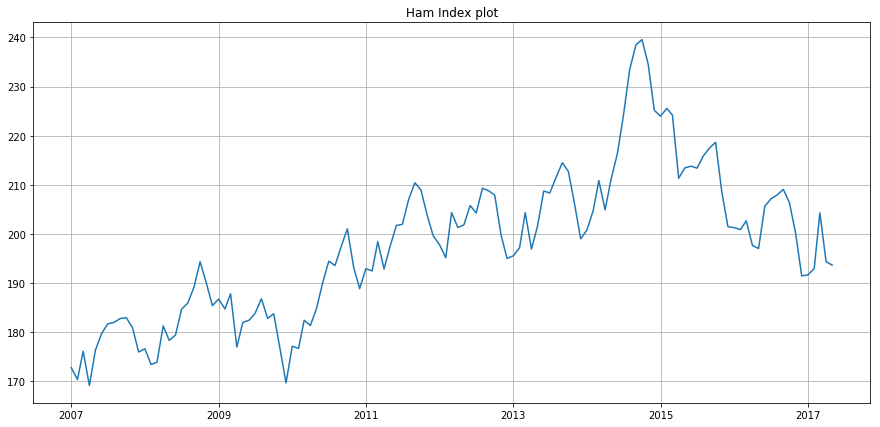

PORK CHOPS INDEX: 


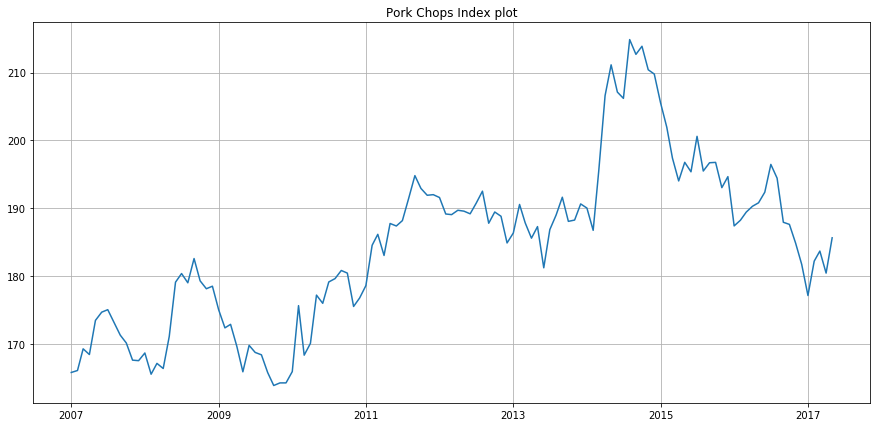

BACON INDEX: 


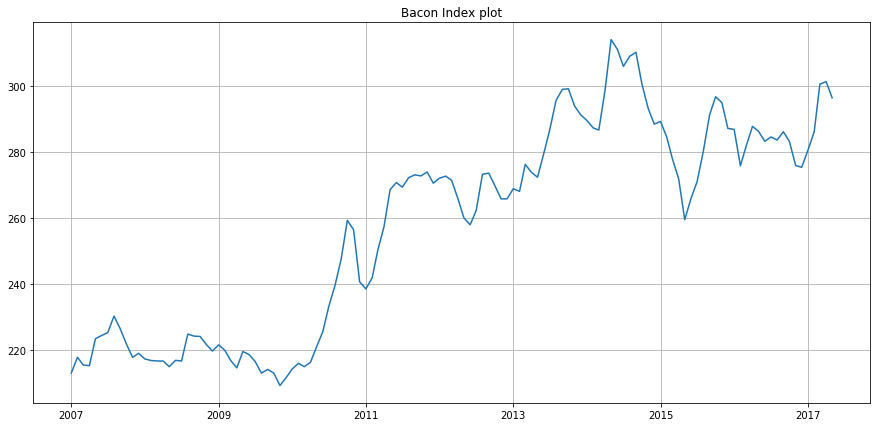

In [4]:
print("HAM INDEX: ")
plt.figure(figsize = (15,7))
plt.plot(data.Ham_Index)
plt.title('Ham Index plot')
plt.grid(True)
plt.show()

print("PORK CHOPS INDEX: ")
plt.figure(figsize = (15,7))
plt.plot(data.Pork_Chops_Index)
plt.title('Pork Chops Index plot')
plt.grid(True)
plt.show()

print("BACON INDEX: ")
plt.figure(figsize = (15,7))
plt.plot(data.Bacon_Index)
plt.title('Bacon Index plot')
plt.grid(True)
plt.show()

In [5]:
# Importing error metrics and definfing the custom error metric

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

#Beware of division by zero errors
def MAAPE(y_true, y_pred):
    return np.mean(np.arctan(np.abs(y_true - y_pred) / y_true))*100

# Naive Moving Average Hypothesis

In [32]:
def moving_average(series,n):
    """
    Calculate average of last n observations
    """
    
    return np.average(series[-n:])

# prediction for the last observed n values
print(moving_average(data_Ham,125))
print(moving_average(data_Pork_Chops,125))
print(moving_average(data_Bacon,125))

#Im not exactly sure what this implies here
#Moving Avergae is used to smooth out the original time series to indicate trends


25536.236874111113
25535.872500111112
25537.918379000002


In [25]:
def plotMovingAverage(series, window, plot_intervals = False, scale = 1.96, plot_anomalies = False):
    
    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies
    """
    
    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(15,5))
    plt.title("moving average\n window size ={}".format(window))
    plt.plot(rolling_mean, "g", label="rolling mean trend")
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale *deviation)
        upper_bound = rolling_mean + (mae + scale *deviation)
        plt.plot(upper_bond, "r--", label = "Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        #Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index = series.index, columns = series.columns)
            anomalies[series < lower_bond] = series[series<lower_bond]
            anomalies[series > upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
            
        plt.plot(series[window:], label="Actual values")
        plt.legend(loc="upper left")
        plt.grid(True)

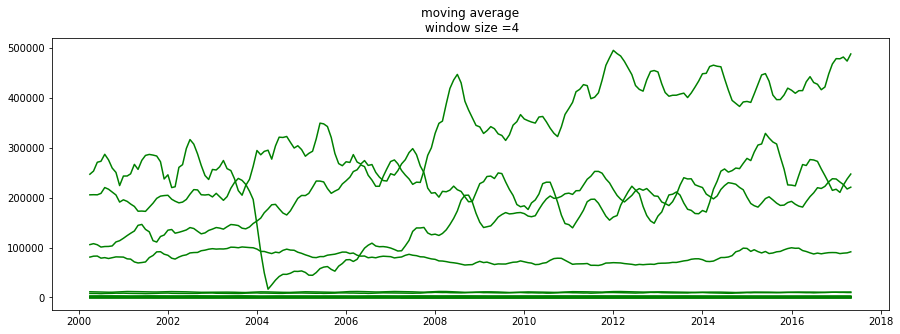

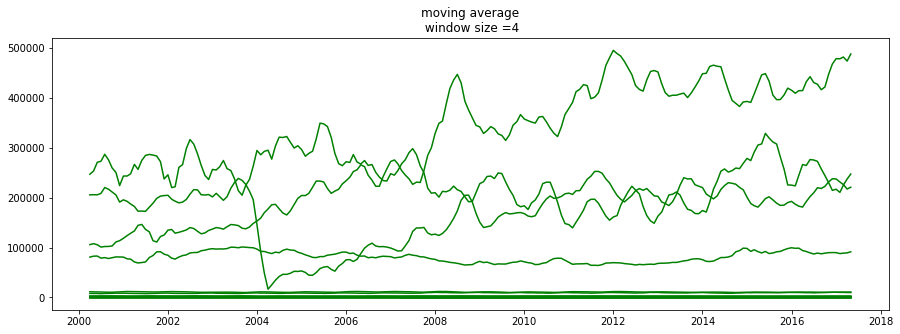

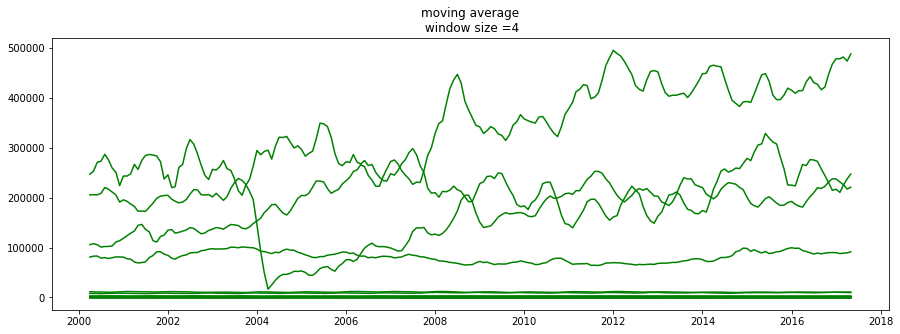

In [33]:
# Smoothing by last n months
plotMovingAverage(data_Ham,4)
plotMovingAverage(data_Pork_Chops,4)
plotMovingAverage(data_Bacon,4)

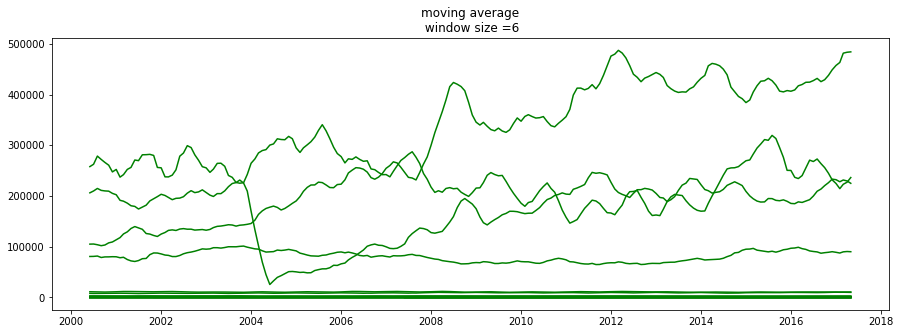

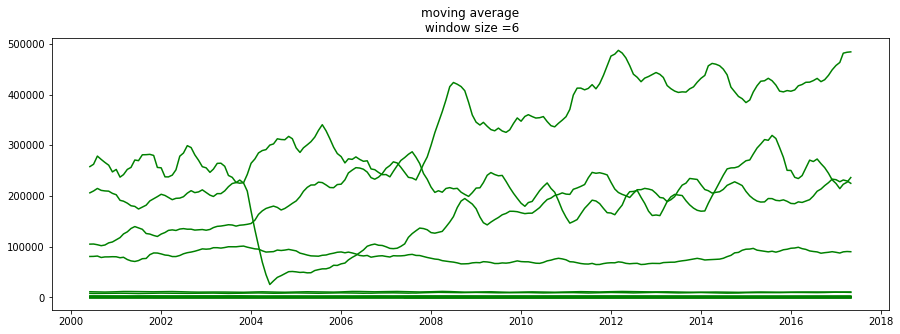

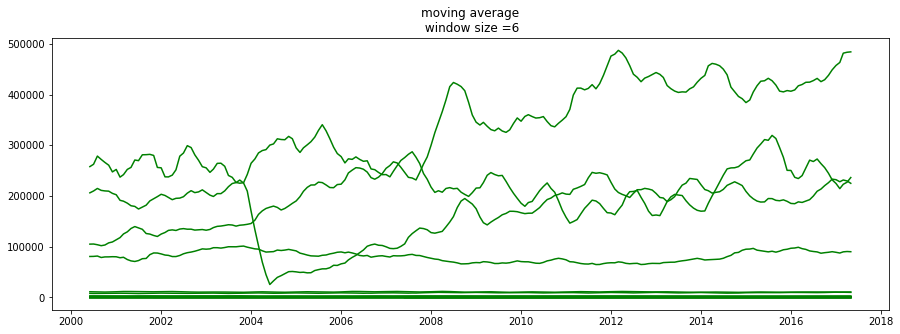

In [34]:
# Smoothing by last 6 months (half yearly trend)
plotMovingAverage(data_Ham,6)
plotMovingAverage(data_Pork_Chops,6)
plotMovingAverage(data_Bacon,6)

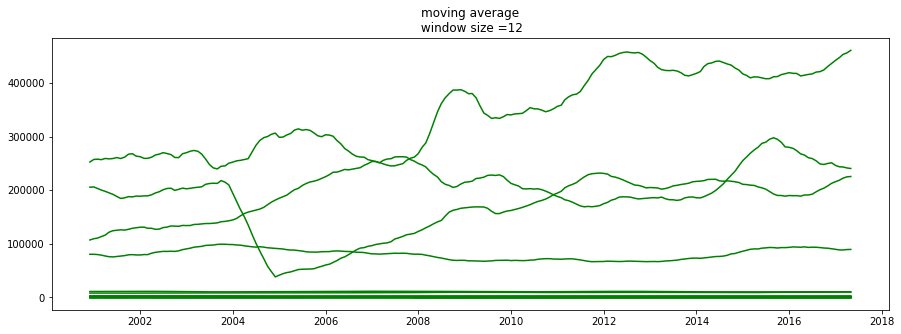

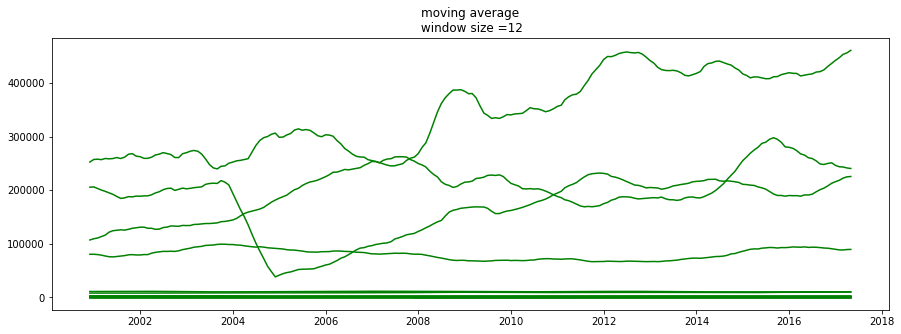

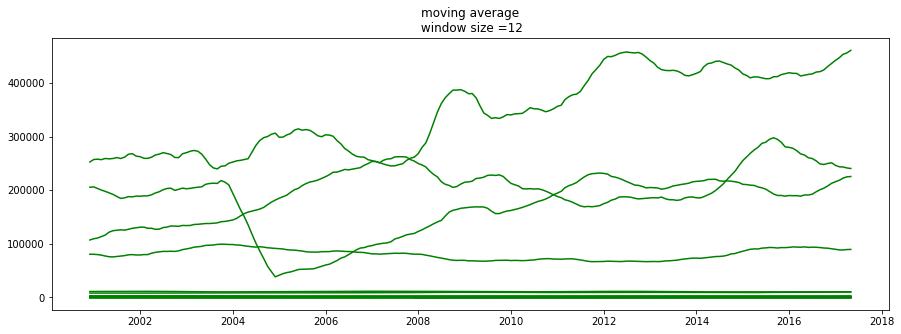

In [35]:
# Smoothing by last 12 months (yearly trend)
plotMovingAverage(data_Ham,12)
plotMovingAverage(data_Pork_Chops,12)
plotMovingAverage(data_Bacon,12)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

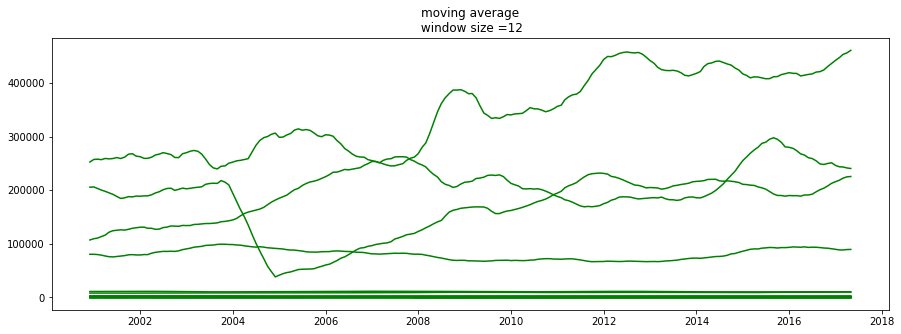

In [36]:
# Plotting with confidence intervals
plotMovingAverage(data_Ham,12,plot_intervals = True)
plotMovingAverage(data_Pork_Chops,12,plot_intervals = True)
plotMovingAverage(data_Bacon,12,plot_intervals = True)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

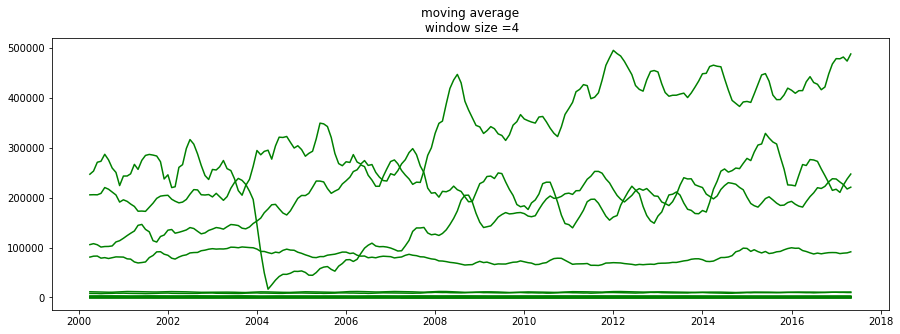

In [37]:
# Finding anomalies
plotMovingAverage(data_Ham, 4, plot_intervals = True, plot_anomalies = True)
plotMovingAverage(data_Pork_Chops, 4, plot_intervals = True, plot_anomalies = True)
plotMovingAverage(data_Bacon, 4, plot_intervals = True, plot_anomalies = True)

# Weighted Average Hypothesis

In [45]:
def weighted_average(series, weights):
    """
        Calculate weighte average on series
    """
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return result

In [47]:
weighted_average(data_Ham, [0.6, 0.3, 0.1])

Beef_CS_LiveWgt_PerHd           1338.2000
Beef_CS_Slaughter_Cnt           2675.3500
Beef_ME_Exp_cwt               228523.4760
Beef_ME_Imp_cwt               264238.3330
OP_Electricity_Index             206.4706
OP_Fuel_Oil_Index                239.6396
OP_Utility_Gas_Index             171.7222
OP_Gasoline_Index                111.1100
OP_Soyabean_Index                146.4500
OP_Hay_Alfalfa_Index             240.8500
OP_Hay_Others_Prc                128.2000
OP_Corn_Index                    140.0500
Pork_CS_LiveWgt_PerHd            284.1000
Pork_CS_Slaughter_Cnt          10206.6500
Pork_ME_Exp_cwt               504660.6470
Pork_ME_Imp_cwt                96318.1210
ME_AvgHrInc_Trk_Driver            21.1340
ME_Unemp_rate                      4.4500
Beef_CS_Prod_Qty                2155.0900
Pork_CS_Prod_Qty                2166.6100
Beef_CS_ColdStrg_Stock_pwt       486.5120
Beef_CS_ColdStrg_Stock_cwt       647.3180
Pork_CS_ColdStrg_Stock_pwt       563.3860
Pork_CS_ColdStrg_Stock_cwt       6

In [48]:
weighted_average(data_Pork_Chops, [0.6, 0.3, 0.1])

Beef_CS_LiveWgt_PerHd           1338.2000
Beef_CS_Slaughter_Cnt           2675.3500
Beef_ME_Exp_cwt               228523.4760
Beef_ME_Imp_cwt               264238.3330
OP_Electricity_Index             206.4706
OP_Fuel_Oil_Index                239.6396
OP_Utility_Gas_Index             171.7222
OP_Gasoline_Index                111.1100
OP_Soyabean_Index                146.4500
OP_Hay_Alfalfa_Index             240.8500
OP_Hay_Others_Prc                128.2000
OP_Corn_Index                    140.0500
Pork_CS_LiveWgt_PerHd            284.1000
Pork_CS_Slaughter_Cnt          10206.6500
Pork_ME_Exp_cwt               504660.6470
Pork_ME_Imp_cwt                96318.1210
ME_AvgHrInc_Trk_Driver            21.1340
ME_Unemp_rate                      4.4500
Beef_CS_Prod_Qty                2155.0900
Pork_CS_Prod_Qty                2166.6100
Beef_CS_ColdStrg_Stock_pwt       486.5120
Beef_CS_ColdStrg_Stock_cwt       647.3180
Pork_CS_ColdStrg_Stock_pwt       563.3860
Pork_CS_ColdStrg_Stock_cwt       6

In [49]:
weighted_average(data_Bacon, [0.6, 0.3, 0.1])

Beef_CS_LiveWgt_PerHd           1338.2000
Beef_CS_Slaughter_Cnt           2675.3500
Beef_ME_Exp_cwt               228523.4760
Beef_ME_Imp_cwt               264238.3330
OP_Electricity_Index             206.4706
OP_Fuel_Oil_Index                239.6396
OP_Utility_Gas_Index             171.7222
OP_Gasoline_Index                111.1100
OP_Soyabean_Index                146.4500
OP_Hay_Alfalfa_Index             240.8500
OP_Hay_Others_Prc                128.2000
OP_Corn_Index                    140.0500
Pork_CS_LiveWgt_PerHd            284.1000
Pork_CS_Slaughter_Cnt          10206.6500
Pork_ME_Exp_cwt               504660.6470
Pork_ME_Imp_cwt                96318.1210
ME_AvgHrInc_Trk_Driver            21.1340
ME_Unemp_rate                      4.4500
Beef_CS_Prod_Qty                2155.0900
Pork_CS_Prod_Qty                2166.6100
Beef_CS_ColdStrg_Stock_pwt       486.5120
Beef_CS_ColdStrg_Stock_cwt       647.3180
Pork_CS_ColdStrg_Stock_pwt       563.3860
Pork_CS_ColdStrg_Stock_cwt       6

# Exponential Smoothing Hypotheis

In [55]:
def exponential_smoothing(series, alpha):
    """
    
        series - dataset with timestamps
        alpha - float[0.0, 1.0], smoothing parameter
    """
    
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plotExponentialSmoothing(series, alphas):
    """
        PLots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
        
    """
    
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(15,7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series,alpha), label = "Alpha ()".format(alpha))
        plt.plot(series.values, "c", label = "Actual")    
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

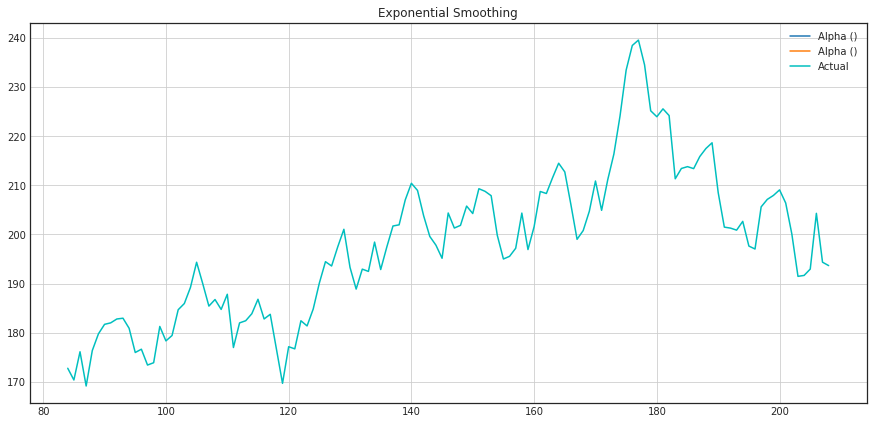

In [58]:
plotExponentialSmoothing(data_Ham.Ham_Index, [0.3, 0.05] )
# WHY DOESNT THE ALPHA OUTPUT SHOW UP

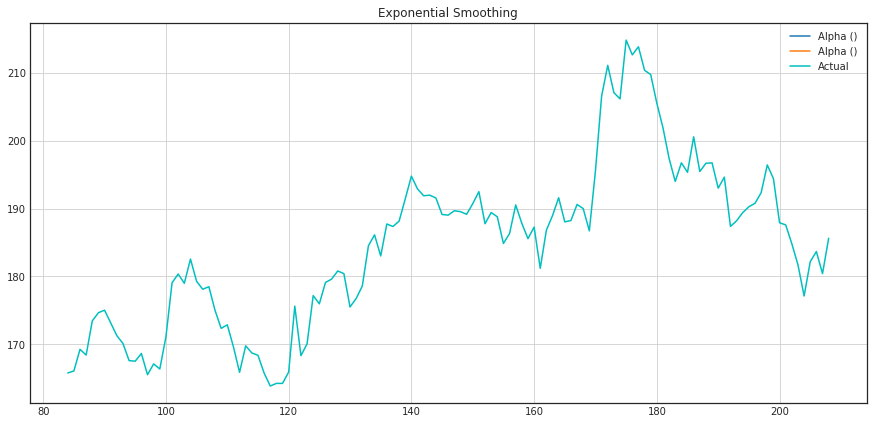

In [59]:
plotExponentialSmoothing(data_Pork_Chops.Pork_Chops_Index, [0.3, 0.05] )

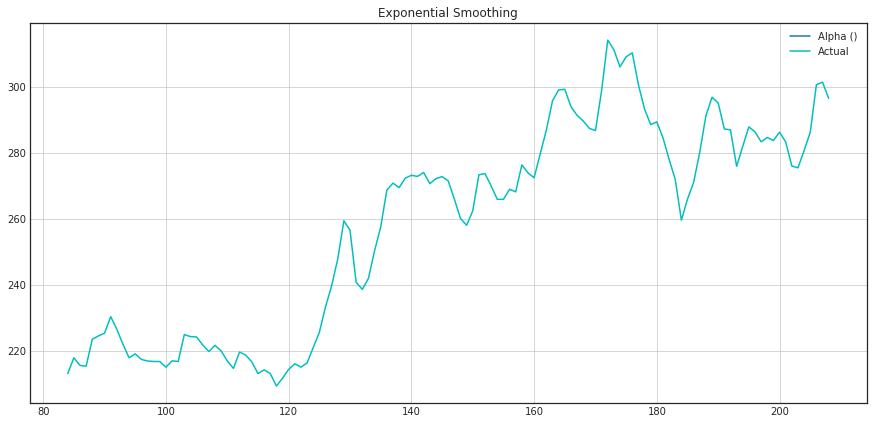

In [64]:
plotExponentialSmoothing(data_Bacon.Bacon_Index, [0.01])

# data_Ham.Ham_Index, we'll do ARIMA for this and then try it out on 
# data_Pork_Chops.Pork_Chops_Index and
# data_Bacon.Bacon_Index 